In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


### set data

In [2]:
M=2
K=3
n=100
N=n * K

In [3]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)
print(X.shape, Y.shape)

(300, 2) (300, 3)


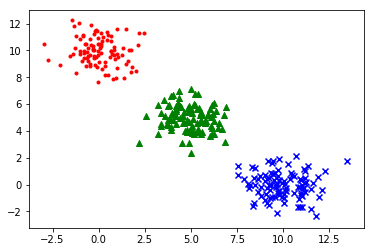

In [4]:
plt_form = ['r.', 'g^', 'bx']
for _x, _f in zip([X1, X2, X3], plt_form):
    c, m = _f[0], _f[1]
    plt.scatter(_x[:, 0], _x[:, 1], c=c, marker=m)
plt.show()


### TensorFlow

In [5]:
print(M, K)
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

2 3


In [6]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [8]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [9]:
batch_size = 50
n_batches = N // batch_size
print(N, batch_size, n_batches)

300 50 6


In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [11]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        print('epock {}, batch {}, start {}, end {}'.format(epoch, i, start, end))
        
        sess.run(train_step, feed_dict={x: X_[start:end], t: Y_[start:end]})

epock 0, batch 0, start 0, end 50
epock 0, batch 1, start 50, end 100
epock 0, batch 2, start 100, end 150
epock 0, batch 3, start 150, end 200
epock 0, batch 4, start 200, end 250
epock 0, batch 5, start 250, end 300
epock 1, batch 0, start 0, end 50
epock 1, batch 1, start 50, end 100
epock 1, batch 2, start 100, end 150
epock 1, batch 3, start 150, end 200
epock 1, batch 4, start 200, end 250
epock 1, batch 5, start 250, end 300
epock 2, batch 0, start 0, end 50
epock 2, batch 1, start 50, end 100
epock 2, batch 2, start 100, end 150
epock 2, batch 3, start 150, end 200
epock 2, batch 4, start 200, end 250
epock 2, batch 5, start 250, end 300
epock 3, batch 0, start 0, end 50
epock 3, batch 1, start 50, end 100
epock 3, batch 2, start 100, end 150
epock 3, batch 3, start 150, end 200
epock 3, batch 4, start 200, end 250
epock 3, batch 5, start 250, end 300
epock 4, batch 0, start 0, end 50
epock 4, batch 1, start 50, end 100
epock 4, batch 2, start 100, end 150
epock 4, batch 3, sta

In [12]:
X_, Y_ = shuffle(X, Y) 

classified = correct_prediction.eval(session=sess, feed_dict={x:X_[0:10], t:Y_[0:10]})

prob = y.eval(session=sess, feed_dict={x:X_[0:10]})

In [13]:
print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  8.96556358e-08   1.58026014e-02   9.84197319e-01]
 [  9.79941726e-01   2.00582072e-02   3.27063319e-08]
 [  6.23386356e-08   2.31216867e-02   9.76878285e-01]
 [  9.88830149e-01   1.11698108e-02   4.71609196e-09]
 [  4.03288595e-07   1.10603064e-01   8.89396608e-01]
 [  2.36165536e-12   1.35802926e-04   9.99864221e-01]
 [  6.27914654e-09   2.80581396e-02   9.71941888e-01]
 [  9.28228442e-03   9.58635807e-01   3.20819020e-02]
 [  9.93630350e-01   6.36961544e-03   2.13315481e-08]
 [  1.61841962e-09   9.47075244e-03   9.90529239e-01]]


In [14]:
_w=sess.run(W)
_b=sess.run(b)
print(_w)
print(_b)

[[-1.09689343  0.30297628  0.79391736]
 [ 0.80980581  0.29080689 -1.10061288]]
[-0.05187939  0.0957571  -0.04387772]


[[-1.09689343  0.30297628]
 [ 0.80980581  0.29080689]]
[-0.05187939  0.0957571 ]
0.518999 3.6738 0.284464
[[ 0.30297628  0.29080689]
 [ 0.79391736 -1.10061288]]
[ 0.0957571  -0.04387772]
1.89453 0.259136 -0.0737042


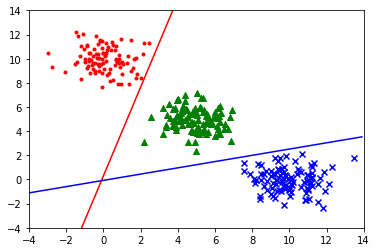

In [15]:

def f(x, w, b):
    print(w)
    print(b)
    _a=w[1,0]-w[1,1]
    _b=-(w[0, 0]-w[1,0])/_a
    _c=-(b[0]-b[1])/_a
    print(_a, _b, _c)
    return np.array(_b*x+_c)

x1 = np.arange(-4, 14, 0.1)

plt.plot(x1, f(x1, _w[:, [0,1]], _b[0:2]), 'r')
plt.plot(x1, f(x1, _w[:, [1,2]].T, _b[1:3]), 'b')


plt_form = ['r.', 'g^', 'bx']
for _x, _f in zip([X1, X2, X3], plt_form):
    c, m = _f[0], _f[1]
    plt.scatter(_x[:, 0], _x[:, 1], c=c, marker=m)

ax=plt.gca()
ax.set_xlim([-4, 14])
ax.set_ylim([-4, 14])
plt.show()


### Keras 

In [16]:
model=Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [17]:
minibatch_size=50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

Epoch 1/20
300/300 [==============================] - 0s 903us/step - loss: 3.2732
Epoch 2/20
300/300 [==============================] - 0s 54us/step - loss: 0.1528
Epoch 3/20
300/300 [==============================] - 0s 57us/step - loss: 0.1186
Epoch 4/20
300/300 [==============================] - 0s 56us/step - loss: 0.0976
Epoch 5/20
300/300 [==============================] - 0s 55us/step - loss: 0.0843
Epoch 6/20
300/300 [==============================] - 0s 56us/step - loss: 0.0752
Epoch 7/20
300/300 [==============================] - 0s 49us/step - loss: 0.0686
Epoch 

In [18]:
X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=1)

In [19]:
print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('output probability:')
print(prob)


classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  2.03605914e-08   1.64975487e-02   9.83502448e-01]
 [  6.94608781e-03   9.89356935e-01   3.69698834e-03]
 [  9.97534394e-01   2.46557640e-03   9.41435641e-09]
 [  5.88641735e-03   9.72499549e-01   2.16140840e-02]
 [  9.28304613e-01   7.16954097e-02   1.82022379e-08]
 [  1.65449110e-09   4.47987486e-03   9.95520115e-01]
 [  9.74664032e-01   2.53356900e-02   2.60127450e-07]
 [  5.71124908e-03   9.62913513e-01   3.13751437e-02]
 [  9.95665967e-01   4.33410890e-03   2.19165153e-09]
 [  1.09517051e-09   9.66613553e-03   9.90333855e-01]]
